## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from joblib import dump

## Preprocessing the data

In [2]:
crime=pd.read_csv("Community.csv")

In [3]:
crime.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(125), int64(2), object(1)
memory usage: 1.9+ MB


In [5]:
crime.describe()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,820.000000,817.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
mean,28.683551,58.826829,46188.336597,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,16.397553,126.420560,25299.726569,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,...,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718,0.232985
min,1.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,9.000000,25065.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,34.000000,23.000000,48090.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,42.000000,59.500000,66660.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,...,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000
max,56.000000,840.000000,94597.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
crime.shape

(1994, 128)

<AxesSubplot:>

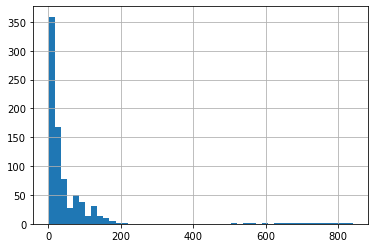

In [7]:
crime["county"].hist(bins=50)

<AxesSubplot:>

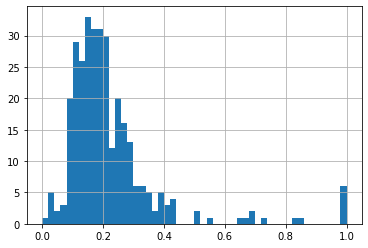

In [8]:
crime["LemasSwFTPerPop"].hist(bins=50)

<AxesSubplot:>

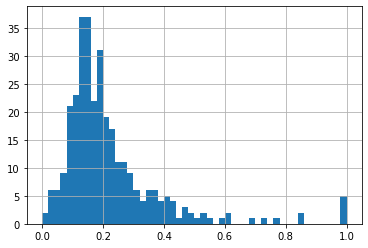

In [9]:
crime["LemasTotReqPerPop"].hist(bins=50)

<AxesSubplot:>

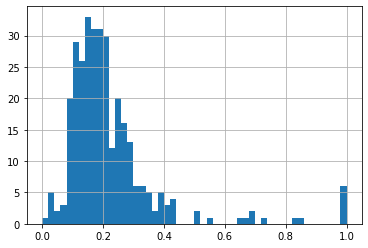

In [10]:
crime["PolicPerPop"].hist(bins=50)

<AxesSubplot:>

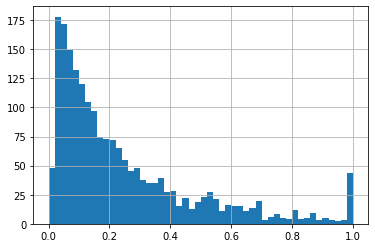

In [11]:
crime["ViolentCrimesPerPop"].hist(bins=50)

In [12]:
crime.drop(["state","county","community","communityname"],axis=1,inplace=True)

In [13]:
crime.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [14]:
crime.shape

(1994, 124)

In [15]:
corr_matrix=crime.corr()
corr_matrix

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
fold,1.000000,-0.007552,0.035488,0.003524,-0.004436,-0.001317,0.000915,-0.000151,0.007080,-0.006858,...,0.017846,-0.012570,-0.000541,0.032115,0.000423,-0.142416,-0.039539,-0.023780,0.037132,-0.032577
population,-0.007552,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,...,0.713652,0.231897,0.270356,0.796090,0.778311,-0.080482,0.100012,0.466352,-0.046494,0.367157
householdsize,0.035488,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,...,-0.015078,-0.004072,-0.051506,-0.091354,-0.021212,-0.017972,-0.000784,-0.094368,-0.152603,-0.034923
racepctblack,0.003524,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,...,0.149758,0.095053,0.147023,0.248632,0.169492,-0.168434,0.022388,0.260793,0.045311,0.631264
racePctWhite,-0.004436,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,...,-0.131389,-0.337458,-0.215636,-0.258277,-0.271687,0.125223,-0.078552,-0.276234,-0.014957,-0.684770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.142416,-0.080482,-0.017972,-0.168434,0.125223,0.069061,0.054310,0.002067,0.040644,0.043506,...,-0.088810,0.111841,0.045513,-0.115349,-0.089736,1.000000,0.007179,0.047851,-0.237240,-0.082317
LemasGangUnitDeploy,-0.039539,0.100012,-0.000784,0.022388,-0.078552,0.139501,0.057854,0.035715,0.015689,-0.003182,...,0.144122,-0.153781,-0.160937,0.078436,0.023349,0.007179,1.000000,-0.035543,-0.021100,0.116163
LemasPctOfficDrugUn,-0.023780,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,...,0.299632,0.228084,0.206644,-0.118595,-0.141782,0.047851,-0.035543,1.000000,0.042185,0.348627
PolicBudgPerPop,0.037132,-0.046494,-0.152603,0.045311,-0.014957,-0.024774,0.004980,-0.242682,-0.209134,-0.158539,...,-0.148499,0.134848,0.155266,0.245532,0.259342,-0.237240,-0.021100,0.042185,1.000000,0.095961


<AxesSubplot:xlabel='racePctWhite', ylabel='ViolentCrimesPerPop'>

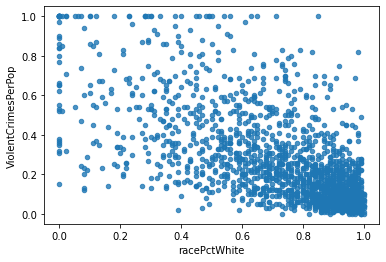

In [16]:
crime.plot(kind="scatter",x="racePctWhite",y="ViolentCrimesPerPop",alpha=0.8)

## Train-Test split

In [17]:
train_set,test_set=train_test_split(crime,random_state=42,test_size=0.2)

In [18]:
train_set.shape

(1595, 124)

In [19]:
test_set.shape

(399, 124)

In [20]:
train_set.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1378,7,0.30,0.48,1.00,0.14,0.03,0.01,0.51,0.56,0.39,...,0.32,0.15,0.10,0.22,0.05,0.25,0.5,0.41,0.1,0.59
1826,10,0.00,0.45,0.01,0.96,0.09,0.05,0.30,0.41,0.23,...,0.01,0.30,0.18,NaN,NaN,NaN,NaN,0.00,NaN,0.02
678,4,0.00,0.23,0.61,0.50,0.03,0.11,0.22,0.32,0.19,...,0.01,0.21,0.13,NaN,NaN,NaN,NaN,0.00,NaN,1.00
1083,6,0.01,0.38,0.03,0.97,0.03,0.02,0.61,0.62,0.55,...,0.06,0.07,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.24
1558,8,0.01,0.41,0.08,0.93,0.01,0.01,0.39,0.41,0.26,...,0.04,0.10,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.19


In [21]:
test_set.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
889,5,0.06,0.46,0.02,0.88,0.20,0.20,0.36,0.41,0.22,...,0.09,0.12,0.05,NaN,NaN,NaN,NaN,0.0,NaN,0.22
1672,9,0.03,0.49,0.00,1.00,0.01,0.00,0.40,0.38,0.26,...,0.08,0.09,0.06,NaN,NaN,NaN,NaN,0.0,NaN,0.04
414,3,0.02,0.59,0.14,0.83,0.16,0.07,0.58,0.68,0.53,...,0.26,0.02,0.09,NaN,NaN,NaN,NaN,0.0,NaN,0.10
1599,9,0.01,0.66,0.03,0.96,0.06,0.02,0.64,0.61,0.48,...,0.08,0.04,0.16,NaN,NaN,NaN,NaN,0.0,NaN,0.08
849,5,0.03,0.45,0.01,0.84,0.62,0.05,0.26,0.20,0.12,...,0.02,0.34,0.08,NaN,NaN,NaN,NaN,0.0,NaN,0.04


## Features and label

In [22]:
train_features=crime.drop("ViolentCrimesPerPop",axis=1).copy()
train_label=crime["ViolentCrimesPerPop"].copy()

In [23]:
train_features.shape

(1994, 123)

In [24]:
train_label.shape

(1994,)

## Creating a pipeline

In [25]:
my_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
])

In [26]:
train_features_tr=my_pipeline.fit_transform(train_features)

In [27]:
train_features

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,...,NaN,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN
1990,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,...,NaN,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN
1991,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28
1992,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18


## Selecting a model

In [28]:
model1=LinearRegression()
model2=RandomForestRegressor()
model3=DecisionTreeRegressor()

In [29]:
model1.fit(train_features_tr,train_label)

LinearRegression()

In [30]:
model2.fit(train_features_tr,train_label)

RandomForestRegressor()

In [31]:
model3.fit(train_features_tr,train_label)

DecisionTreeRegressor()

In [32]:
some_data=train_features.iloc[:5]
some_data=my_pipeline.fit_transform(some_data)
model1.predict(some_data)

array([ 0.15557727,  0.25756629,  0.35777685,  0.28889797, -0.04385562])

In [33]:
train_label[:5]

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [34]:
model2.predict(some_data)

array([0.2007, 0.5217, 0.4049, 0.1779, 0.0366])

In [35]:
model3.predict(some_data)

array([0.2 , 0.67, 0.43, 0.12, 0.03])

In [36]:
predicted1=model1.predict(train_features_tr)
error1=mean_squared_error(train_label,predicted1)
error1

0.01626577258496375

In [37]:
predicted2=model2.predict(train_features_tr)
error2=mean_squared_error(train_label,predicted2)
error2

0.0026707305366098296

In [38]:
predicted3=model3.predict(train_features_tr)
error3=mean_squared_error(train_label,predicted3)
error3

4.3705280834264e-36

## Cross evaluation

In [39]:
def rmse(a):
    score=cross_val_score(a,train_features_tr,train_label,scoring="neg_mean_squared_error")
    rmse=np.sqrt(-score)
    print_score(rmse)
    

In [40]:
def print_score(a):
    print(a)
    print("mean : ",a.mean())
    print("standard deviation : ",a.std())

In [41]:
rmse(model1)

[0.14203152 0.15768552 0.13093815 0.12736876 0.91845442]
mean :  0.2952956749773249
standard deviation :  0.311758280631779


In [42]:
rmse(model2)

[0.14522677 0.15361691 0.1353208  0.12852133 0.12886517]
mean :  0.13831019596429261
standard deviation :  0.00975808764902448


In [43]:
rmse(model3)

[0.21837231 0.21951587 0.19913409 0.18652608 0.19077138]
mean :  0.20286394698415583
standard deviation :  0.013746736255025356


## Dumping model and storing data

In [44]:
dump(model2,"ViolentCrimePerPop.joblib")

['ViolentCrimePerPop.joblib']

In [45]:
%store test_set

Stored 'test_set' (DataFrame)


In [46]:
%store my_pipeline

Stored 'my_pipeline' (Pipeline)
